<a href="https://colab.research.google.com/github/GVSU-CIS635/projects-outliers/blob/SARIMA-Building/SARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.26.4 pmdarima==2.0.4

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from matplotlib.pylab import rcParams

In [13]:
# Set the default figure size for matplotlib plots to 15 inches wide by 6 inches tall
rcParams["figure.figsize"] = (15, 6)

# Increase the default font size of the titles in matplotlib plots to extra-extra-large
rcParams["axes.titlesize"] = "xx-large"

# Make the titles of axes in matplotlib plots bold for better visibility
rcParams["axes.titleweight"] = "bold"

# Set the default location of the legend in matplotlib plots to the upper left corner
rcParams["legend.loc"] = "upper left"

# Configure pandas to display all columns of a DataFrame when printed to the console
pd.set_option('display.max_columns', None)

# Configure pandas to display all rows of a DataFrame when printed to the console
pd.set_option('display.max_rows', None)

In [21]:
url = "streamflow_filled_ARIMA.csv"
df = pd.read_csv(url)

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [24]:
df = df.drop(columns=['Day', 'Unnamed: 0'])

In [25]:
df_monthly = df.resample('ME').agg({
    'Q (m3/s)': 'sum',
    'Month': 'first',
    'Year': 'first'
})

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 612 entries, 1967-01-31 to 2017-12-31
Freq: ME
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q (m3/s)  612 non-null    float64
 1   Month     612 non-null    int64  
 2   Year      612 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 19.1 KB


<Axes: xlabel='Date'>

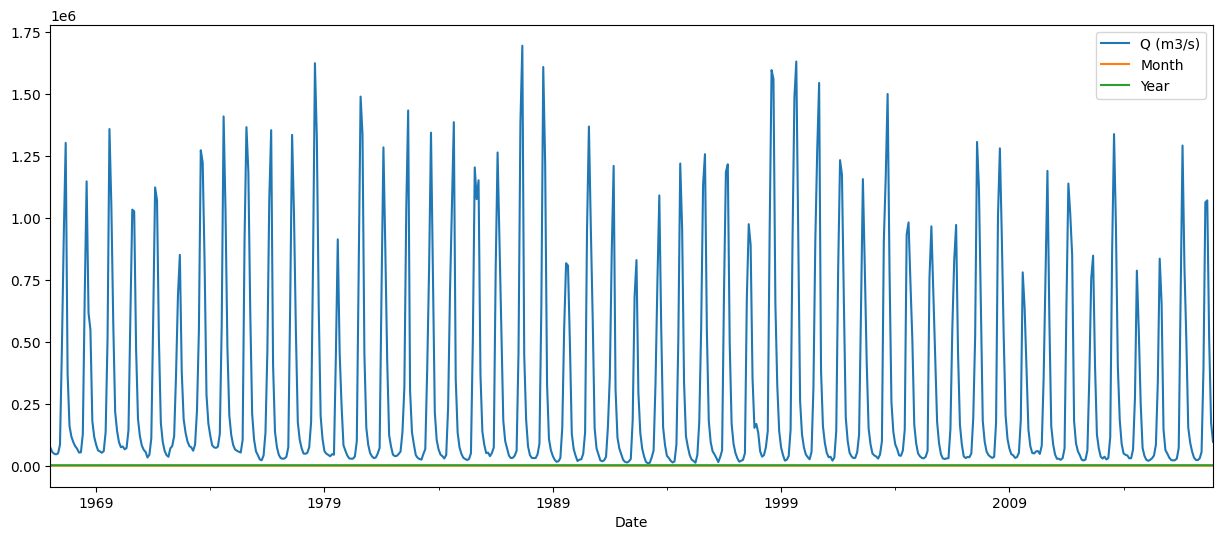

In [26]:
df_monthly.info()

df_monthly.plot()

In [27]:
dftrain = df_monthly[df_monthly['Year'] != 2017]
dftest = df_monthly[df_monthly['Year'] == 2017]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 1967-01-31 to 2016-12-31
Freq: ME
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q (m3/s)  600 non-null    float64
 1   Month     600 non-null    int64  
 2   Year      600 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 18.8 KB


<Axes: xlabel='Date'>

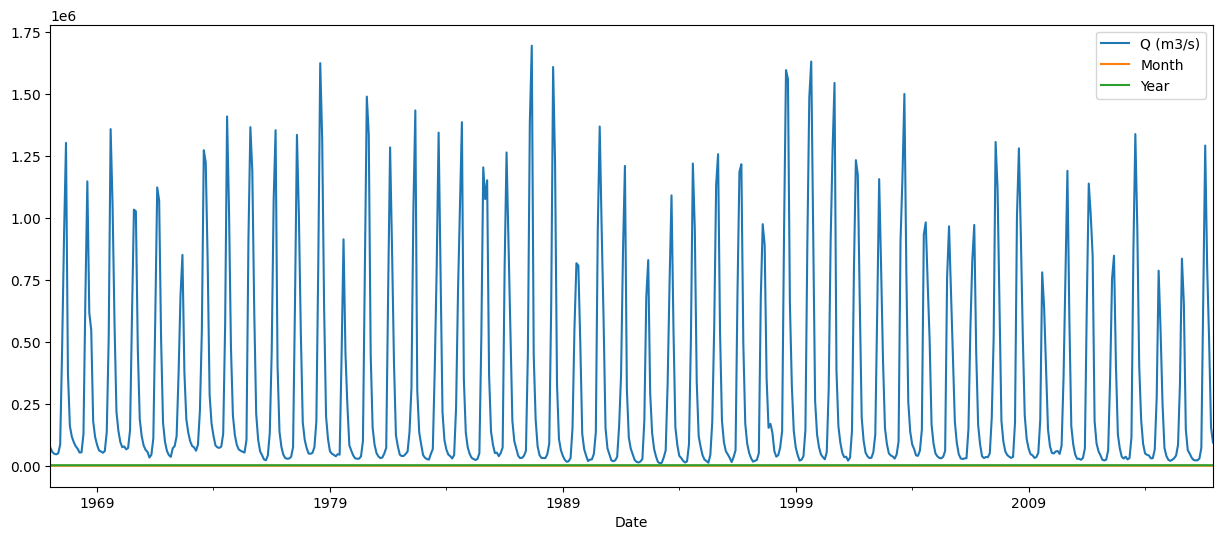

In [28]:
dftrain.info()

dftrain.plot()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: ME
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q (m3/s)  12 non-null     float64
 1   Month     12 non-null     int64  
 2   Year      12 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 384.0 bytes


<Axes: xlabel='Date'>

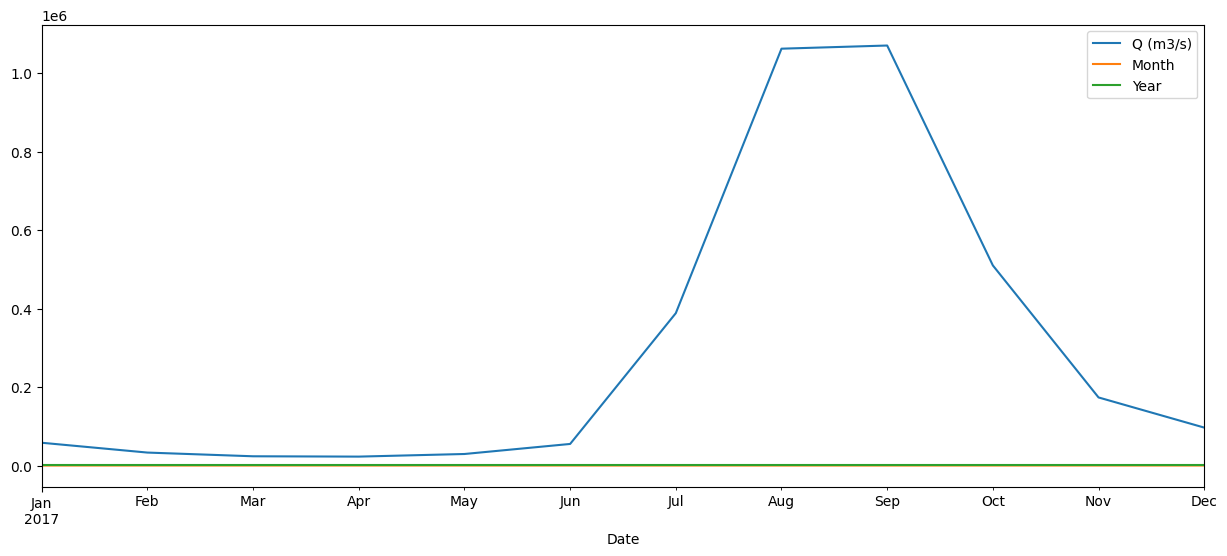

In [29]:
dftest.info()

dftest.plot()

In [31]:
import pmdarima as pm
auto_arima = pm.auto_arima(dftrain['Q (m3/s)'], m=12)
auto_arima

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

ARIMA(order=(3, 0, 4), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True)

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Smodel = SARIMAX(dftrain['Q (m3/s)'], order=(3,0,4), seasonal_order=(2,0,0,12))

In [33]:
SARIMA_mf = Smodel.fit()
print(SARIMA_mf.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                      
Dep. Variable:                            Q (m3/s)   No. Observations:                  600
Model:             SARIMAX(3, 0, 4)x(2, 0, [], 12)   Log Likelihood               -8019.558
Date:                             Sat, 25 Oct 2025   AIC                          16059.117
Time:                                     19:28:54   BIC                          16103.086
Sample:                                 01-31-1967   HQIC                         16076.233
                                      - 12-31-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1952     43.689      0.004      0.996     -85.433      85.824
ar.L2          0.0450      

<Axes: xlabel='Date'>

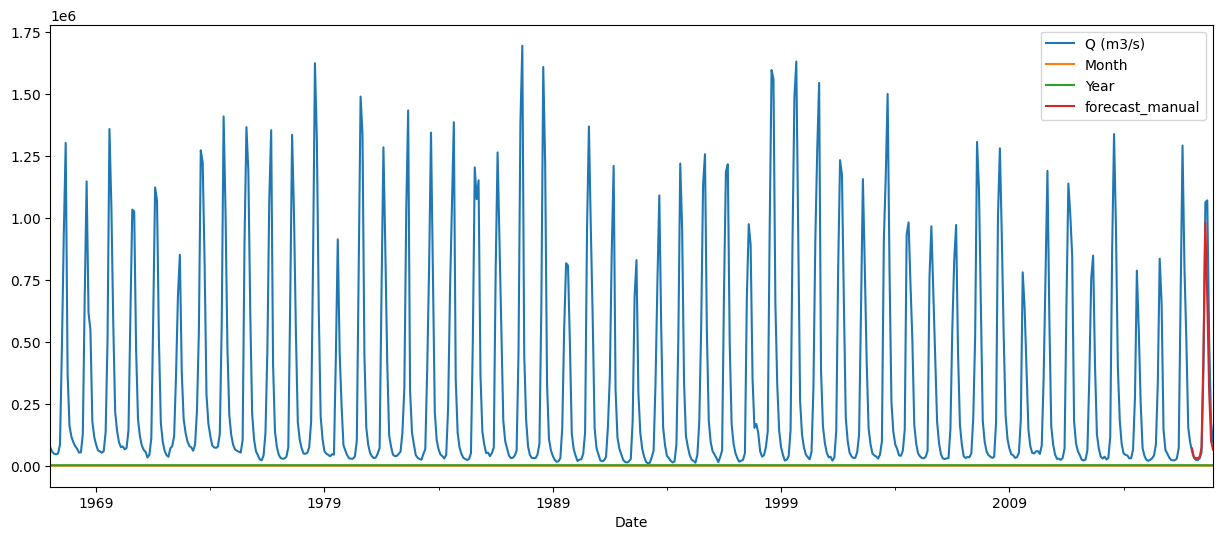

In [36]:
forecast_test = SARIMA_mf.forecast(len(dftest))
df_monthly['forecast_manual'] = [None]*len(dftrain) + list(forecast_test)
df_monthly.plot()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(dftest['Q (m3/s)'], forecast_test)
mape = mean_absolute_percentage_error(dftest['Q (m3/s)'], forecast_test)
mse = np.sqrt(mean_squared_error(dftest['Q (m3/s)'], forecast_test))

print(f'mae(SARIMA): {mae}')
print(f'mape(SARIMA): {mape}')
print(f'mse(SARIMA): {mse}')

mae(SARIMA): 76774.13494542144
mape(SARIMA): 0.2712049499148955
mse(SARIMA): 135606.6864020245
